<a href="https://colab.research.google.com/github/l-munkanta/GISMA/blob/main/decision_trees_graphplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

##Importing Libraries

In [89]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics
from sklearn import tree

##Loading the Dataset

In [90]:
df = pd.read_csv("mnist.csv")
df = df.set_index("id")
df.head()  

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Splitting the Dataset to Training and Testing Data

In [91]:
x = df.drop(["class"], axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print('df:', df.shape)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

df: (4000, 785)
x_train: (3000, 784)
x_test: (1000, 784)
y_train: (3000,)
y_test: (1000,)


##Training the Dataset (Decision Tree - Gini Classifier)




In [92]:
model = sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 4, random_state = 12345)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=12345)

##Testing the Model (Decision Tree - Gini Classifier)

In [93]:
y_pred = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy

0.58

In [94]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_350 <= 116.50
|   |--- feature_435 <= 2.50
|   |   |--- feature_597 <= 16.50
|   |   |   |--- feature_459 <= 1.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_459 >  1.50
|   |   |   |   |--- class: 5
|   |   |--- feature_597 >  16.50
|   |   |   |--- feature_461 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_461 >  4.50
|   |   |   |   |--- class: 2
|   |--- feature_435 >  2.50
|   |   |--- feature_542 <= 51.50
|   |   |   |--- feature_432 <= 0.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_432 >  0.50
|   |   |   |   |--- class: 4
|   |   |--- feature_542 >  51.50
|   |   |   |--- feature_271 <= 0.50
|   |   |   |   |--- class: 6
|   |   |   |--- feature_271 >  0.50
|   |   |   |   |--- class: 2
|--- feature_350 >  116.50
|   |--- feature_489 <= 1.50
|   |   |--- feature_290 <= 9.50
|   |   |   |--- feature_459 <= 145.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_459 >  145.00
|   |   |   |   |--- class: 8
|   |   |--- fea

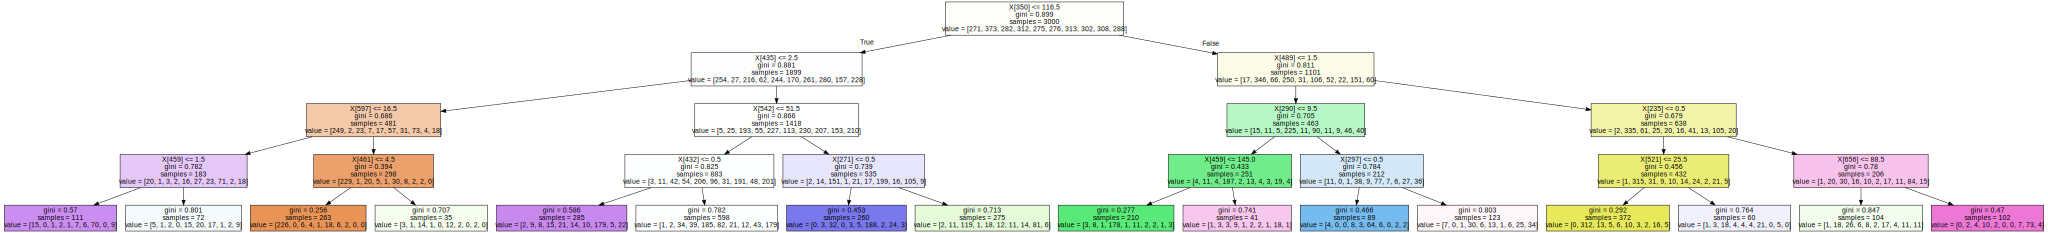

In [95]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,filled=True)
                  
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

##Converting File to HTML

In [ ]:
!jupyter nbconvert --to html decision_trees.ipynb